In [1]:
#Importing necessary libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#importing the dataset
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking Rows and Columns for 'day.csv'
bike.shape

(730, 16)

In [5]:
#Details for the Numeric Columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Checking for Null values

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no missing values present in the database

In [8]:
#dropping 'Instant Column' as it is acting as a index and not useful for the analysis

bike.drop(['instant'], axis=1, inplace = True)

In [9]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#dropping dteday as columns 'yr' and 'month' are provding the required data

bike.drop(['dteday'], axis=1, inplace=True)

In [11]:
#dropping casual and registered as our target variable 'count' includes both casual and registered users
bike.drop(['casual','registered'],axis=1,inplace=True)

In [12]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#Renaming columns to improve comprehension
bike.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)

In [14]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Encoding Labels for season, weathersit, workingday, year, month, 

In [15]:

bike['month'] = bike['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike['workingday'] = bike['workingday'].map({1:'Working day',0:'Holiday'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist+Cloudy',3:'Light_Snow/Light_Rain',4:'Heavy Rain/Snow+Fog'})
bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})






In [16]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,Working day,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,Working day,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,Working day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,Working day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,Working day,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Plots 

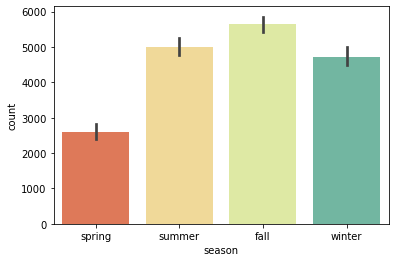

In [17]:
#Season
sns.barplot('season', 'count', data =bike , palette = 'Spectral')
plt.show()

#### Inferences
- Fall season has the maximum number of bike rentals.

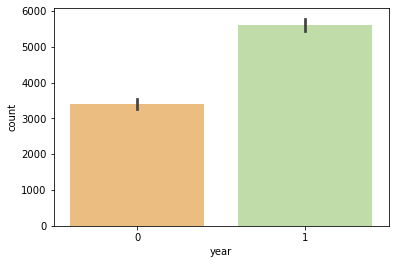

In [18]:
#Year 0-2018 , 1-2019

sns.barplot('year', 'count', data =bike , palette = 'Spectral')
plt.show()

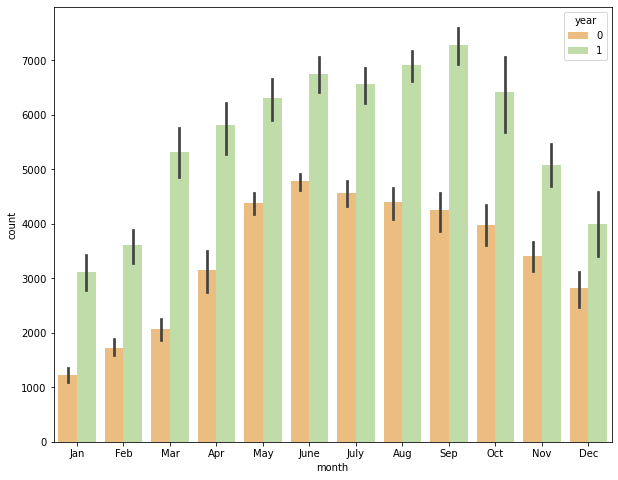

In [19]:
#Month
plt.figure(figsize=(10,8))
sns.barplot('month', 'count', data =bike ,hue = 'year', palette = 'Spectral')
plt.show()

#### Inferences
- There has been a signifincant increase in the customer base in 2019 than in 2018

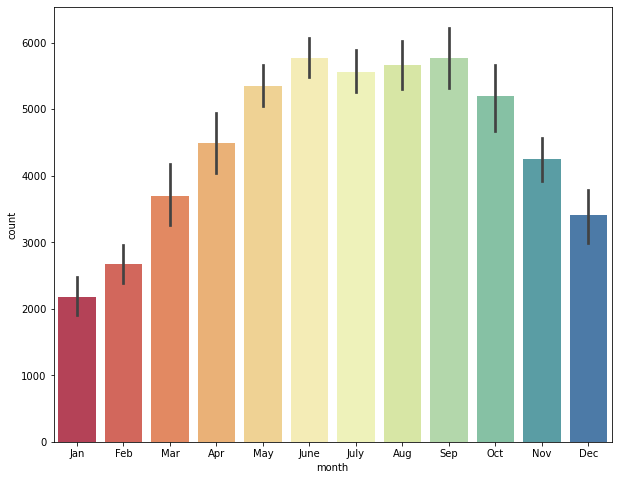

In [20]:
#Distribution by Month

plt.figure(figsize=(10,8))
sns.barplot('month', 'count', data =bike , palette = 'Spectral')
plt.show()

#### Inferences
- Months of June and September see the most number of rentals.

In [21]:
temp_weekday = bike.groupby('weekday')['count'].max()
print(temp_weekday)

weekday
Fri    7804
Mon    8227
Sat    8362
Sun    8714
Thu    8173
Tue    7525
Wed    7767
Name: count, dtype: int64


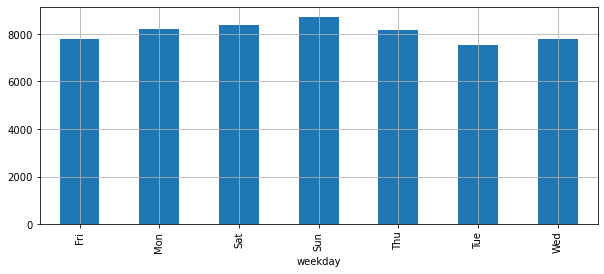

In [22]:
plt.figure(figsize=(10,4))
temp_weekday.plot(kind = 'bar', grid = True)
plt.show()

#### Inferences
- Weekends are the most active days followed by Monday.

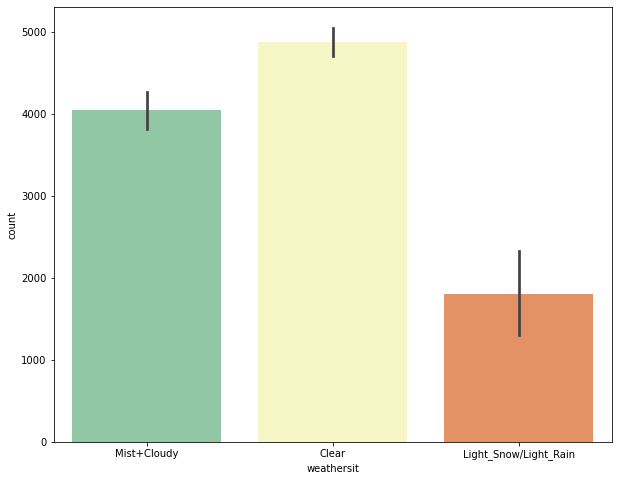

In [23]:
plt.figure(figsize=(10,8))
sns.barplot('weathersit', 'count', data =bike , palette = 'Spectral_r')
plt.show()

In [24]:
bike.weathersit.value_counts()

Clear                    463
Mist+Cloudy              246
Light_Snow/Light_Rain     21
Name: weathersit, dtype: int64

#### Inferences
- Most customers rentals were on Clear/ Partly cloudy days. 

<Figure size 720x360 with 0 Axes>

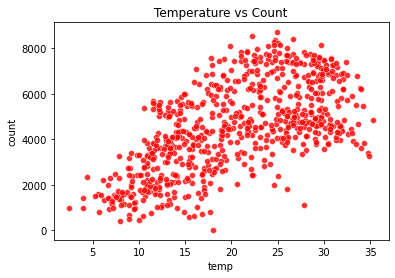

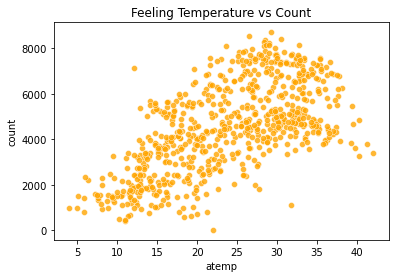

In [25]:
#Temperature 
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(1,1)
plt.title('Temperature vs Count')
ax = sns.scatterplot(x ='temp', y='count', data = bike, color= 'red', alpha =0.8)


#Feeling Temperature
fig, ax = plt.subplots(1,1)
plt.title('Feeling Temperature vs Count')
ax = sns.scatterplot(x ='atemp', y='count', data = bike, color= 'orange', alpha =0.8)

#### Inferences
- Both temperature and feeling temperature show a similar pattern , most of the rentals are in temperature range of 15-35
- The data from temp and atemp might cause muticollinearity and accordingly treated.

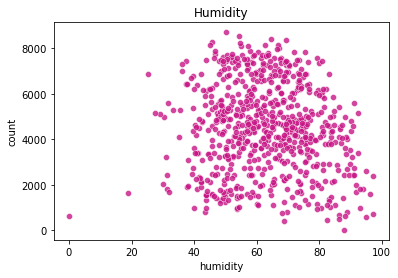

In [26]:
#Humidity
plt.title('Humidity')

ax = sns.scatterplot(x ='humidity', y='count', data = bike, color= 'mediumvioletred', alpha =0.8)

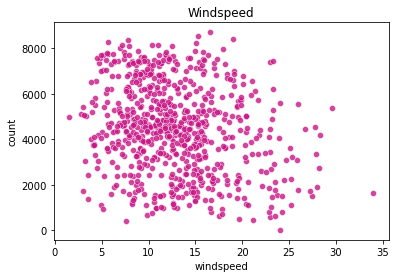

In [27]:
#Windspeed
plt.title('Windspeed')
ax = sns.scatterplot(x ='windspeed', y='count', data = bike, color= 'mediumvioletred', alpha =0.8)

#### Inferences
- Most of the rentals were done days with medium to high Humidity
- However customers preferred low to medium windspeed 

## Numerical and Categorical Variables

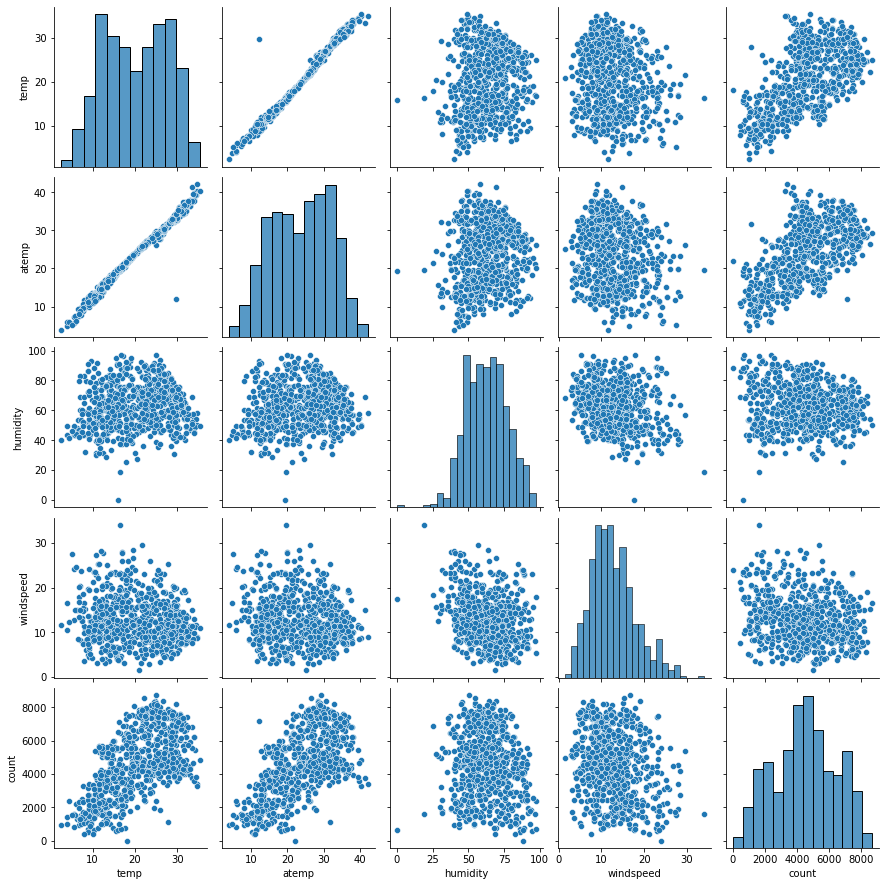

In [28]:
#PairPlots for Numerical Variables 

sns.pairplot(bike, vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count'])
plt.show()

- Linear relation between temp, atemp vs count

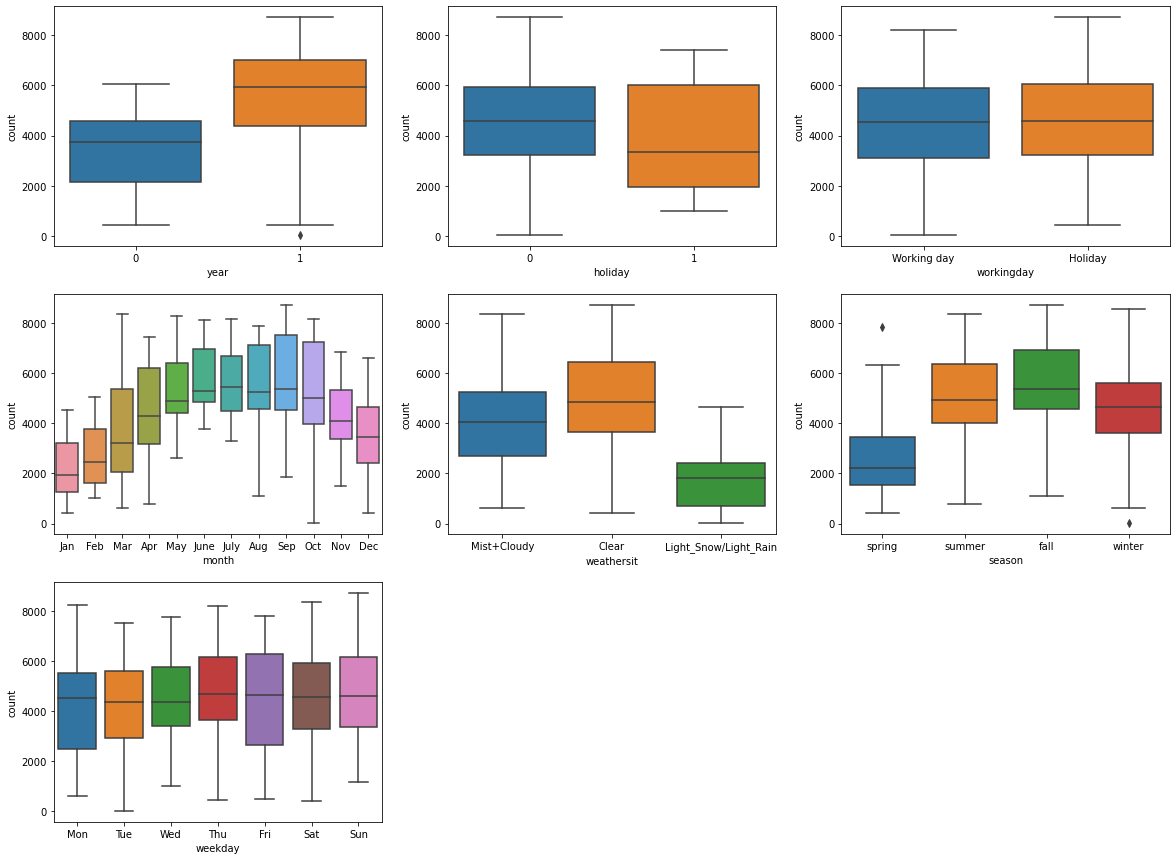

In [29]:
#Box Plot Visualizations for Categorical Variables

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'year', y = 'count', data = bike) #(0: 2018, 1:2019)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike) #weather day is a holiday or not
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.show()


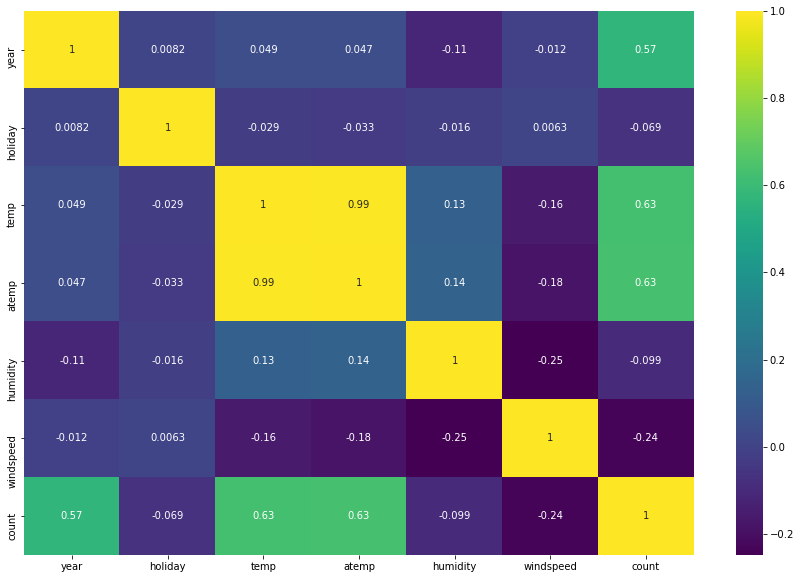

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(bike.corr(),cmap='viridis',annot = True)
plt.show()

<AxesSubplot:>

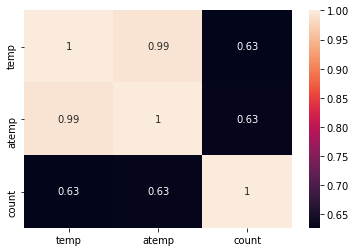

In [31]:
#Correlation between temp and atemp

data= bike[['temp','atemp','count']]
sns.heatmap(data.corr(),annot=True)

In [32]:
#Dropping Atemp
bike.drop('atemp',axis=1,inplace=True)

#### Inferences
- We can se a very high correlation between temp and atemp , hence atemp was to avoid multicollinearity 
- temp , atemp also signifanctly correlated to the target variable count

In [33]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,Working day,Mist+Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,Working day,Mist+Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,Working day,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,Working day,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,Working day,Clear,9.305237,43.6957,12.522300,1600


In [34]:
#Creating Dummy Variables

season_dummy = pd.get_dummies(bike['season'], drop_first = True)

month_dummy= pd.get_dummies(bike['month'],drop_first=True)

weekday_dummy= pd.get_dummies(bike['weekday'],drop_first=True)

workingday_dummy = pd.get_dummies(bike['workingday'],drop_first=True)

weathersit_dummy= pd.get_dummies(bike['weathersit'],drop_first=True)


In [35]:
#Adding to main dataframe

bike = pd.concat([bike,season_dummy,month_dummy,weekday_dummy,workingday_dummy,weathersit_dummy], axis = 1)

In [36]:
#Dropping Variables as Dummies have been created for them
bike.drop(['season','month', 'weekday', 'workingday', 'weathersit'],axis=1,inplace=True)

In [37]:
bike.head()

,year,holiday,temp,humidity,windspeed,count,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light_Snow/Light_Rain,Mist+Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


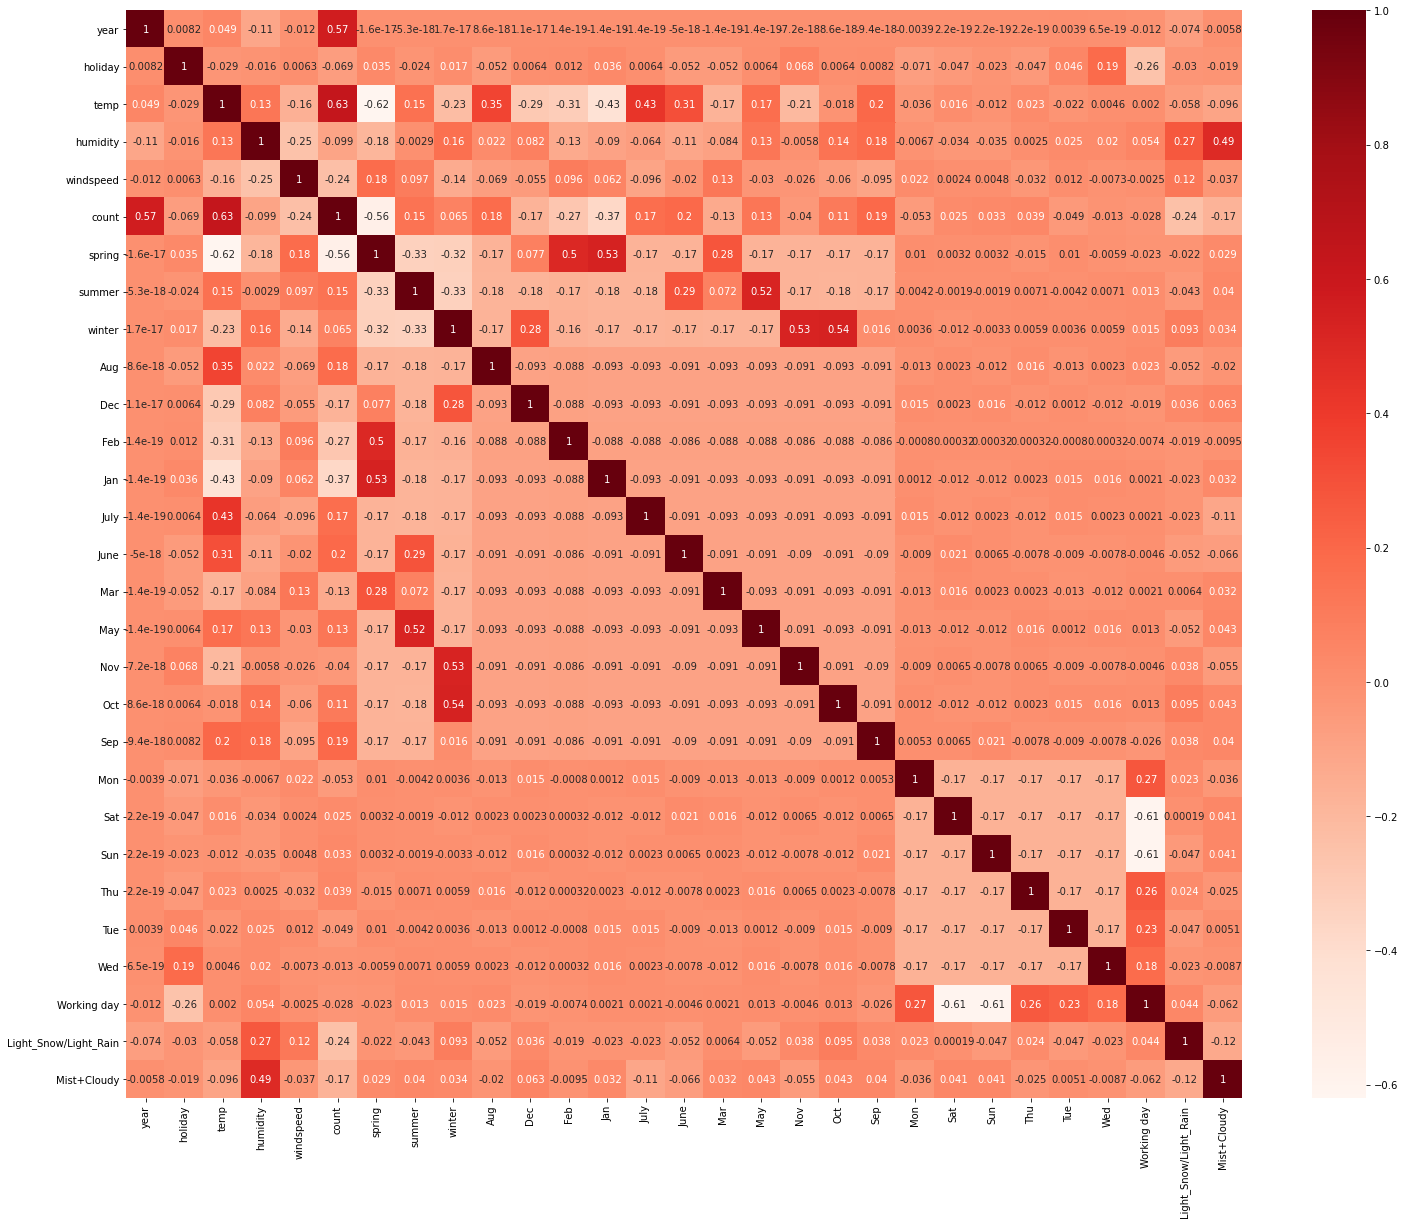

In [38]:
# Overview of Correlations with the dummy variables

plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='Reds', annot = True)
plt.show()

## Splliting the Data


In [39]:
#splitting data 70-30  

from sklearn.model_selection import train_test_split

np.random.seed(0)

bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [40]:
bike_train.shape

(510, 29)

In [41]:
bike_test.shape

(220, 29)

In [42]:
bike_train.describe()

,year,holiday,temp,humidity,windspeed,count,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light_Snow/Light_Rain,Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,20.108257,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,0.096078,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.029412,0.345098
std,0.500429,0.157763,7.431626,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,0.294988,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475867
min,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,20.277923,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#Rescaling Features using Min-Max Scalar

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#all the numeric variables
numeric_var=['temp','humidity','windspeed','count']

#fitting
bike_train[numeric_var] = scaler.fit_transform(bike_train[numeric_var])

In [44]:
bike_train.describe()

,year,holiday,temp,humidity,windspeed,count,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light_Snow/Light_Rain,Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.029412,0.345098
std,0.500429,0.157763,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
bike_train.head()

,year,holiday,temp,humidity,windspeed,count,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light_Snow/Light_Rain,Mist+Cloudy
576,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


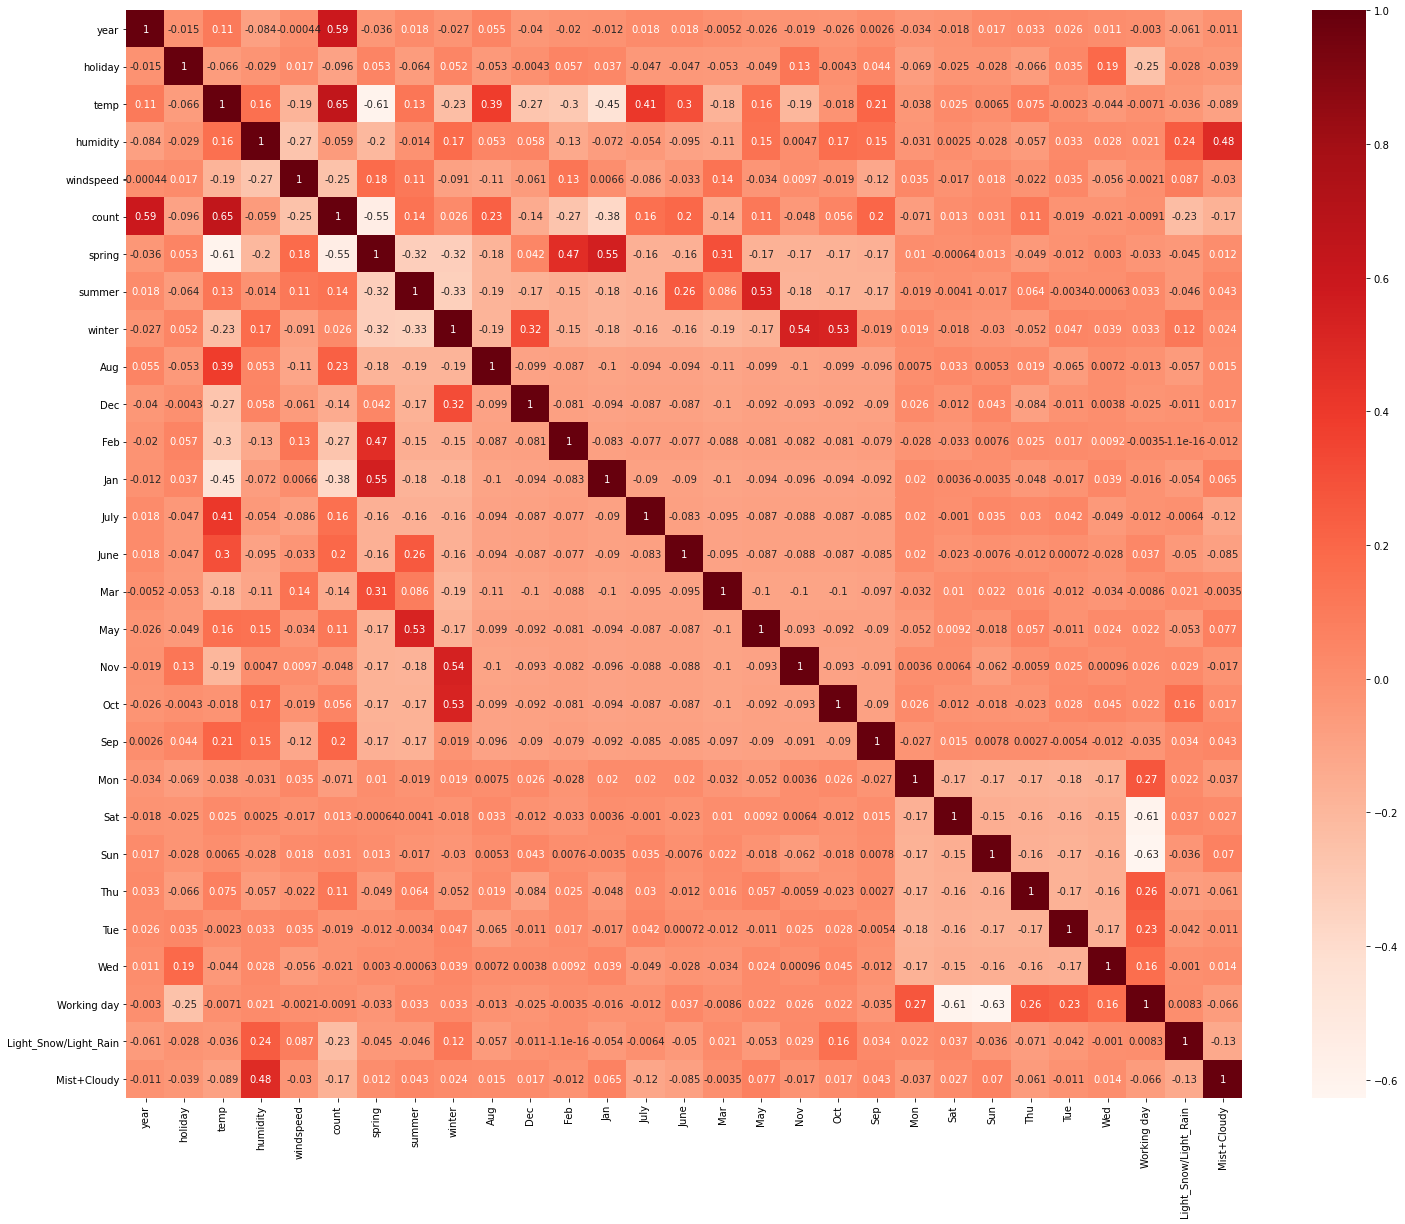

In [46]:
# Checking for multicollinearity in variables after scaling 

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(), cmap='Reds', annot = True)
plt.show()

In [47]:
#Creating X_train and y_train

y_train = bike_train.pop('count')
X_train = bike_train

In [48]:
#y_train.head()

### Modelling

In [49]:
#Importing  Linear Regression function and RFE from scikit Learn 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
#linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)


#Running RFE with 15 variables

rfe = RFE(lm, 15)          
rfe = rfe.fit(X_train, y_train)

In [51]:
#Listing the selected variables

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Working day', False, 3),
 ('Light_Snow/Light_Rain', True, 1),
 ('Mist+Cloudy', True, 1)]

In [52]:
#Columns with RFE Support = True

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light_Snow/Light_Rain',
       'Mist+Cloudy'],
      dtype='object')


In [53]:
#Columns with RFE Support = False
col_f = X_train.columns[~rfe.support_]
print(col_f)

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Working day'],
      dtype='object')


#### Building Model using STATSMODEL

### Model 1 

In [54]:
#importing Statsmodels api
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Creating new X_Train with varibles selected from RFE
X_train_rfe = X_train[col]

#Adding Constant
X_train_sm1 = sm.add_constant(X_train_rfe)

#Linear Regression
lr_model = sm.OLS(y_train, X_train_sm1).fit()

In [56]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          8.15e-189
Time:                        16:01:29   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3197      0.036      8.859      0.000       0.249       0.391
year                      0.2304      0.008     28.487      0.000       0.215       0.246
holiday                  -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                      0.4815      0.037     13.005      0.000       0.409       0.554
humidity                 -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring                   -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer                    0.0423      0.015      2.761      0.006       0.012       0.072
winter                    0.1019      0.018      5.656      0.000       0.067       0.137
Dec                      -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan                      -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July                     -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov                      -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep                       0.0755      0.017      4.466      0.000       0.042       0.109
Light_Snow/Light_Rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist+Cloudy              -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()

X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist+Cloudy,2.32
0,year,2.09
11,Nov,1.85
9,Jan,1.75


### Model 2 

In [58]:
#Dropping Humidity as it has high VIF

X_train_rfe =X_train_rfe.drop(['humidity'],axis = 1)

In [59]:
#running lr_model again

X_train_sm2 = sm.add_constant(X_train_rfe)

lr_model2 = sm.OLS(y_train, X_train_sm2).fit()

In [60]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.75e-186
Time:                        16:01:29   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2450      0.032      7.618      0.000       0.182       0.308
year                      0.2345      0.008     28.687      0.000       0.218       0.251
holiday                  -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                      0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring                   -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer                    0.0349      0.015      2.251      0.025       0.004       0.065
winter                    0.0869      0.018      4.831      0.000       0.052       0.122
Dec                      -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan                      -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July                     -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov                      -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep                       0.0687      0.017      4.015      0.000       0.035       0.102
Light_Snow/Light_Rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist+Cloudy              -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()

X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
10,Nov,1.81
8,Jan,1.66
9,July,1.59
13,Mist+Cloudy,1.57


### Model 3 

In [62]:
#removing temp and testing the model

X_train_rfe =X_train_rfe.drop(['temp'],axis = 1)

#running lr_model again

X_train_sm3 = sm.add_constant(X_train_rfe)

lr_model3 = sm.OLS(y_train, X_train_sm3).fit()

lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.82e-159
Time:                        16:01:30   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5954      0.016     37.460      0.000       0.564       0.627
year                      0.2457      0.009     26.616      0.000       0.228       0.264
holiday                  -0.0855      0.030     -2.887      0.004      -0.144      -0.027
windspeed                -0.1902      0.029     -6.662      0.000      -0.246      -0.134
spring                   -0.2503      0.018    -14.125      0.000      -0.285      -0.216
summer                   -0.0497      0.016     -3.160      0.002      -0.081      -0.019
winter                   -0.0231      0.018     -1.307      0.192      -0.058       0.012
Dec                      -0.1086      0.019     -5.660      0.000      -0.146      -0.071
Jan                      -0.1202      0.020     -6.056      0.000      -0.159      -0.081
July                     -0.0182      0.021     -0.875      0.382      -0.059       0.023
Nov                      -0.0995      0.021     -4.731      0.000      -0.141      -0.058
Sep                       0.0534      0.019      2.750      0.006       0.015       0.092
Light_Snow/Light_Rain    -0.3117      0.028    -11.150      0.000      -0.367      -0.257
Mist+Cloudy              -0.0869      0.010     -8.800      0.000      -0.106      -0.068
==============================================================================
Omnibus:                       56.274   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.272
Skew:                          -0.588   Prob(JB):                     1.89e-29
Kurtosis:                       5.200   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()

X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.89
3,spring,2.89
5,winter,2.85
4,summer,2.02
0,year,1.83
9,Nov,1.80
7,Jan,1.64
12,Mist+Cloudy,1.53
6,Dec,1.46
8,July,1.20


### Model 4

In [64]:
#removing winter as it has high p-value and hence insignificant

X_train_rfe =X_train_rfe.drop(['winter'],axis = 1)

#running lr_model again

X_train_sm4 = sm.add_constant(X_train_rfe)

lr_model4 = sm.OLS(y_train, X_train_sm4).fit()

lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.32e-160
Time:                        16:01:30   Log-Likelihood:                 437.97
No. Observations:                 510   AIC:                            -849.9
Df Residuals:                     497   BIC:                            -794.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5857      0.014     41.641      0.000       0.558       0.613
year                      0.2459      0.009     26.622      0.000       0.228       0.264
holiday                  -0.0856      0.030     -2.886      0.004      -0.144      -0.027
windspeed                -0.1912      0.029     -6.695      0.000      -0.247      -0.135
spring                   -0.2385      0.015    -15.662      0.000      -0.268      -0.209
summer                   -0.0394      0.014     -2.892      0.004      -0.066      -0.013
Dec                      -0.1181      0.018     -6.632      0.000      -0.153      -0.083
Jan                      -0.1218      0.020     -6.147      0.000      -0.161      -0.083
July                     -0.0081      0.019     -0.420      0.674      -0.046       0.030
Nov                      -0.1122      0.019     -6.013      0.000      -0.149      -0.076
Sep                       0.0587      0.019      3.087      0.002       0.021       0.096
Light_Snow/Light_Rain    -0.3160      0.028    -11.372      0.000      -0.371      -0.261
Mist+Cloudy              -0.0876      0.010     -8.875      0.000      -0.107      -0.068
==============================================================================
Omnibus:                       60.810   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.008
Skew:                          -0.622   Prob(JB):                     7.25e-33
Kurtosis:                       5.328   Cond. No.                         8.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()

X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.47
3,spring,2.46
4,summer,1.80
0,year,1.79
6,Jan,1.62
11,Mist+Cloudy,1.48
8,Nov,1.26
9,Sep,1.18
7,July,1.16
5,Dec,1.14


### Model 5


In [66]:
#removing July as it has high p-value and hence insignificant

X_train_rfe =X_train_rfe.drop(['July'],axis = 1)

#running lr_model again

X_train_sm5 = sm.add_constant(X_train_rfe)

lr_model5 = sm.OLS(y_train, X_train_sm5).fit()

lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.71e-161
Time:                        16:01:30   Log-Likelihood:                 437.88
No. Observations:                 510   AIC:                            -851.8
Df Residuals:                     498   BIC:                            -800.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5834      0.013     44.987      0.000       0.558       0.609
year                      0.2459      0.009     26.646      0.000       0.228       0.264
holiday                  -0.0854      0.030     -2.883      0.004      -0.144      -0.027
windspeed                -0.1910      0.029     -6.694      0.000      -0.247      -0.135
spring                   -0.2367      0.015    -16.212      0.000      -0.265      -0.208
summer                   -0.0374      0.013     -2.937      0.003      -0.062      -0.012
Dec                      -0.1166      0.017     -6.689      0.000      -0.151      -0.082
Jan                      -0.1216      0.020     -6.143      0.000      -0.160      -0.083
Nov                      -0.1101      0.018     -6.120      0.000      -0.145      -0.075
Sep                       0.0607      0.018      3.304      0.001       0.025       0.097
Light_Snow/Light_Rain    -0.3155      0.028    -11.374      0.000      -0.370      -0.261
Mist+Cloudy              -0.0872      0.010     -8.883      0.000      -0.106      -0.068
==============================================================================
Omnibus:                       60.252   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.320
Skew:                          -0.619   Prob(JB):                     2.78e-32
Kurtosis:                       5.303   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()

X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.23
3,spring,2.37
0,year,1.74
4,summer,1.70
6,Jan,1.62
10,Mist+Cloudy,1.48
7,Nov,1.23
8,Sep,1.16
5,Dec,1.13
9,Light_Snow/Light_Rain,1.07


### Model 6

In [68]:
#adding back temp

X_train_rfe['temp']=X_train['temp']
X_train_rfe.head()

,year,holiday,windspeed,spring,summer,Dec,Jan,Nov,Sep,Light_Snow/Light_Rain,Mist+Cloudy,temp
576,1,0,0.264686,0,0,0,0,0,0,0,0,0.815169
426,1,0,0.255342,1,0,0,0,0,0,0,1,0.442393
728,1,0,0.663106,1,0,1,0,0,0,0,0,0.245101
482,1,0,0.188475,0,1,0,0,0,0,0,1,0.395666
111,0,0,0.380981,0,1,0,0,0,0,0,1,0.345824


In [69]:
#running lr_model again

X_train_sm6 = sm.add_constant(X_train_rfe)

lr_model6 = sm.OLS(y_train, X_train_sm6).fit()

lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.71e-180
Time:                        16:01:30   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     497   BIC:                            -889.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3525      0.026     13.675      0.000       0.302       0.403
year                      0.2374      0.008     28.062      0.000       0.221       0.254
holiday                  -0.0885      0.027     -3.275      0.001      -0.142      -0.035
windspeed                -0.1638      0.026     -6.260      0.000      -0.215      -0.112
spring                   -0.1376      0.017     -8.312      0.000      -0.170      -0.105
summer                    0.0019      0.012      0.157      0.876      -0.022       0.026
Dec                      -0.0278      0.018     -1.528      0.127      -0.063       0.008
Jan                      -0.0649      0.019     -3.433      0.001      -0.102      -0.028
Nov                      -0.0107      0.019     -0.559      0.576      -0.048       0.027
Sep                       0.0677      0.017      4.041      0.000       0.035       0.101
Light_Snow/Light_Rain    -0.2835      0.025    -11.121      0.000      -0.334      -0.233
Mist+Cloudy              -0.0773      0.009     -8.578      0.000      -0.095      -0.060
temp                      0.3103      0.031     10.083      0.000       0.250       0.371
==============================================================================
Omnibus:                       55.331   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.743
Skew:                          -0.600   Prob(JB):                     3.66e-27
Kurtosis:                       5.071   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()

X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.44
11,temp,3.86
3,spring,2.44
0,year,2.05
4,summer,1.74
6,Jan,1.63
10,Mist+Cloudy,1.52
8,Sep,1.25
7,Nov,1.24
5,Dec,1.13


### Model 7

In [71]:
#removing Summer as it has high p-value and hence insignificant

X_train_rfe =X_train_rfe.drop(['summer'],axis = 1)

#running lr_model again

X_train_sm7 = sm.add_constant(X_train_rfe)

lr_model5 = sm.OLS(y_train, X_train_sm7).fit()

lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.50e-181
Time:                        16:01:30   Log-Likelihood:                 485.32
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     498   BIC:                            -895.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3542      0.023     15.163      0.000       0.308       0.400
year                      0.2374      0.008     28.097      0.000       0.221       0.254
holiday                  -0.0884      0.027     -3.276      0.001      -0.141      -0.035
windspeed                -0.1633      0.026     -6.299      0.000      -0.214      -0.112
spring                   -0.1388      0.015     -9.563      0.000      -0.167      -0.110
Dec                      -0.0287      0.017     -1.687      0.092      -0.062       0.005
Jan                      -0.0652      0.019     -3.476      0.001      -0.102      -0.028
Nov                      -0.0120      0.017     -0.693      0.489      -0.046       0.022
Sep                       0.0670      0.016      4.186      0.000       0.036       0.098
Light_Snow/Light_Rain    -0.2839      0.025    -11.208      0.000      -0.334      -0.234
Mist+Cloudy              -0.0772      0.009     -8.586      0.000      -0.095      -0.060
temp                      0.3088      0.029     10.594      0.000       0.252       0.366
==============================================================================
Omnibus:                       55.735   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.179
Skew:                          -0.603   Prob(JB):                     1.79e-27
Kurtosis:                       5.084   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()

X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.94
10,temp,3.79
3,spring,2.20
0,year,2.05
5,Jan,1.63
9,Mist+Cloudy,1.50
7,Sep,1.17
6,Nov,1.16
4,Dec,1.10
1,holiday,1.06


### Model 8

In [73]:
##removing November as it has high p-value and hence insignificant

X_train_rfe =X_train_rfe.drop(['Nov'],axis = 1)

#running lr_model again

X_train_sm8 = sm.add_constant(X_train_rfe)

lr_model8 = sm.OLS(y_train, X_train_sm8).fit()

lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.01e-182
Time:                        16:01:30   Log-Likelihood:                 485.08
No. Observations:                 510   AIC:                            -948.2
Df Residuals:                     499   BIC:                            -901.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3467      0.021     16.768      0.000       0.306       0.387
year                      0.2373      0.008     28.103      0.000       0.221       0.254
holiday                  -0.0910      0.027     -3.404      0.001      -0.143      -0.038
windspeed                -0.1623      0.026     -6.275      0.000      -0.213      -0.112
spring                   -0.1352      0.014     -9.980      0.000      -0.162      -0.109
Dec                      -0.0256      0.016     -1.560      0.119      -0.058       0.007
Jan                      -0.0635      0.019     -3.416      0.001      -0.100      -0.027
Sep                       0.0681      0.016      4.278      0.000       0.037       0.099
Light_Snow/Light_Rain    -0.2836      0.025    -11.202      0.000      -0.333      -0.234
Mist+Cloudy              -0.0769      0.009     -8.565      0.000      -0.095      -0.059
temp                      0.3177      0.026     12.160      0.000       0.266       0.369
==============================================================================
Omnibus:                       55.099   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.867
Skew:                          -0.596   Prob(JB):                     3.44e-27
Kurtosis:                       5.077   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()

X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.76
9,temp,3.76
3,spring,2.14
0,year,2.03
5,Jan,1.63
8,Mist+Cloudy,1.49
6,Sep,1.16
4,Dec,1.09
7,Light_Snow/Light_Rain,1.06
1,holiday,1.03


### Model 9

In [75]:
##removing winter as it has high p-value and testing the model

X_train_rfe =X_train_rfe.drop(['Dec'],axis = 1)

#running lr_model again

X_train_sm9 = sm.add_constant(X_train_rfe)

lr_model9 = sm.OLS(y_train, X_train_sm9).fit()

lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.04e-183
Time:                        16:01:30   Log-Likelihood:                 483.83
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     500   BIC:                            -905.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3339      0.019     17.556      0.000       0.297       0.371
year                      0.2373      0.008     28.061      0.000       0.221       0.254
holiday                  -0.0902      0.027     -3.370      0.001      -0.143      -0.038
windspeed                -0.1567      0.026     -6.109      0.000      -0.207      -0.106
spring                   -0.1340      0.014     -9.892      0.000      -0.161      -0.107
Jan                      -0.0570      0.018     -3.142      0.002      -0.093      -0.021
Sep                       0.0693      0.016      4.352      0.000       0.038       0.101
Light_Snow/Light_Rain    -0.2822      0.025    -11.137      0.000      -0.332      -0.232
Mist+Cloudy              -0.0767      0.009     -8.533      0.000      -0.094      -0.059
temp                      0.3320      0.025     13.550      0.000       0.284       0.380
==============================================================================
Omnibus:                       53.479   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.842
Skew:                          -0.581   Prob(JB):                     2.58e-26
Kurtosis:                       5.048   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()

X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,3.76
2,windspeed,3.74
3,spring,2.11
0,year,2.03
4,Jan,1.60
7,Mist+Cloudy,1.48
5,Sep,1.16
6,Light_Snow/Light_Rain,1.06
1,holiday,1.03


### RESIDUAL ANALYSIS

In [77]:
y_train_pred = lr_model9.predict(X_train_sm9)

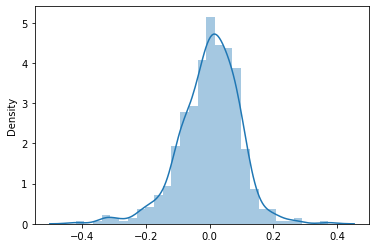

In [78]:
res = y_train-y_train_pred
sns.distplot(res)
plt.show()

#### Error Terms are Normally Distributed

In [79]:
X_train_sm9.head()

,const,year,holiday,windspeed,spring,Jan,Sep,Light_Snow/Light_Rain,Mist+Cloudy,temp
576,1.0,1,0,0.264686,0,0,0,0,0,0.815169
426,1.0,1,0,0.255342,1,0,0,0,1,0.442393
728,1.0,1,0,0.663106,1,0,0,0,0,0.245101
482,1.0,1,0,0.188475,0,0,0,0,1,0.395666
111,1.0,0,0,0.380981,0,0,0,0,1,0.345824


In [80]:
X_train_sm9.shape

(510, 10)

### SCALING ON TEST DATA

In [81]:
#Applying scaling on Test Data
numeric_var=['temp','humidity','windspeed','count'] 
bike_test[numeric_var] = scaler.transform(bike_test[numeric_var])
bike_test.head()

,year,holiday,temp,humidity,windspeed,count,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light_Snow/Light_Rain,Mist+Cloudy
184,0,1,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,0.901354,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,0.881625,0.437098,0.339570,0.547400,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
#Dividing into X_test and y_test

y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,Aug,Dec,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light_Snow/Light_Rain,Mist+Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,0.086364,...,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.640909,0.027273,0.318182
std,0.500809,0.187620,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,0.281541,...,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.480828,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
X_train_new = X_train_sm9.drop(['const'], axis = 1)

In [84]:
X_train_new.head()

,year,holiday,windspeed,spring,Jan,Sep,Light_Snow/Light_Rain,Mist+Cloudy,temp
576,1,0,0.264686,0,0,0,0,0,0.815169
426,1,0,0.255342,1,0,0,0,1,0.442393
728,1,0,0.663106,1,0,0,0,0,0.245101
482,1,0,0.188475,0,0,0,0,1,0.395666
111,0,0,0.380981,0,0,0,0,1,0.345824


In [85]:
#Creating New Test dataframe
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [86]:
X_test_new.columns

Index(['const', 'year', 'holiday', 'windspeed', 'spring', 'Jan', 'Sep',
       'Light_Snow/Light_Rain', 'Mist+Cloudy', 'temp'],
      dtype='object')

In [87]:
#PREDICTIONS
y_pred = lr_model9.predict(X_test_new)

In [88]:
#R^2

from sklearn.metrics import r2_score 

r2 = r2_score(y_test, y_pred)
r2

0.7953094573825343

In [89]:
#R^2 Adjusted
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]-1 #to account for the constant 

# We find the Adjusted R-squared using the formula
adj_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adj_r2

mean_a_err = round(mean_absolute_error(y_test, y_pred),4)
mean_a_err

mean_sq = round(sqrt(mean_squared_error(y_test, y_pred)),4)
mean_sq

print('n =',n)
print('Predictors =',p)
print('Adj R^2 =',adj_r2)
print('Mean Absoulute Error =',mean_a_err)
print('RMSE =',mean_sq)

n = 220
Predictors = 9
Adj R^2 = 0.7865
Mean Absoulute Error = 0.0763
RMSE = 0.0989


Text(0, 0.5, 'y_pred')

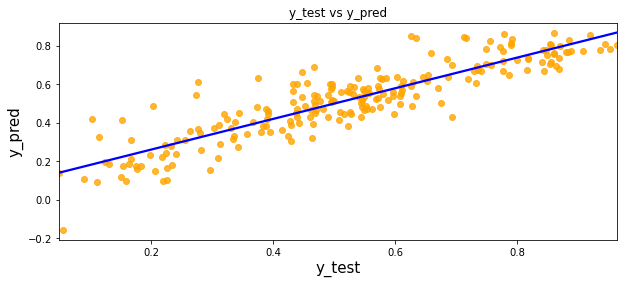

In [90]:
#Visualization

plt.figure(figsize=(10,4))
plt.title('y_test vs y_pred')
sns.regplot(x=y_test, y=y_pred,fit_reg=True,scatter_kws={"color": "orange"},line_kws={"color": "Blue"},ci = 0)
plt.xlabel('y_test', fontsize=15)  # X-label
plt.ylabel('y_pred', fontsize=15)  #Y label

- **Equation for the best fitted line** 

$ count = 0.2373\times year + 0.3320\times temp - 0.0902\times holiday -  0.1567 \times windspeed - 0.1340\times spring - 0.0570\times Jan + 0.0693\times Sep - -0.2822\times Light_Snow/LightRain -0.0767\times Mist+Cloudy $

- Data is Linear

In [91]:
#ADJUSTED R^2
adj_r2 = round(1-(1-r2)*(n-1)/(n-p-1),10)
adj_r2

0.7865370056

### R-Squared Calculation

In [92]:
#R^2
from sklearn.metrics import r2_score 
r2 = r2_score(y_test, y_pred)
r2

0.7953094573825343

### Overview of Training Model Used


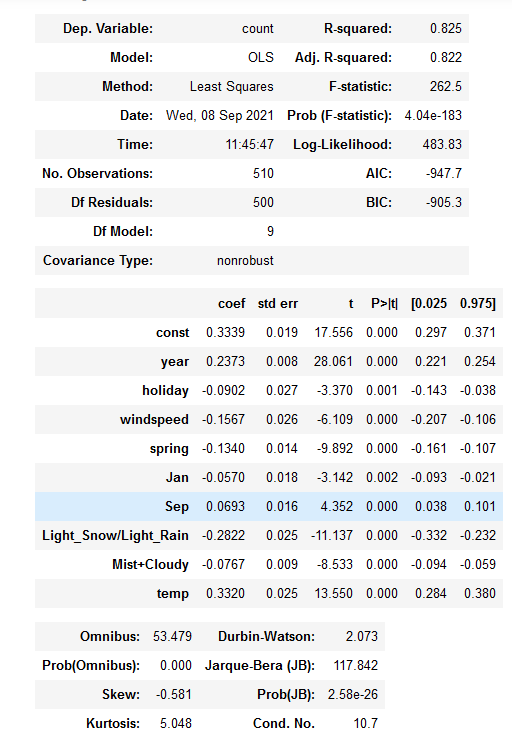 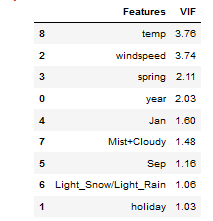

### Comparisions

- **Training R-Squared =** 0.825 or 82.5%
- **Training Add. R-Squared =** 0.822 or 82.2%

- **Prob (F-statistic) =** Close to 0 

- **Test R-Squared =** 0.7953094573825343 or 79.5%
- **Test Adj. R-Squared =** 0.7865370056 or 78.65%


- **Difference in Training vs Test R-Squared =** 3%
- **Difference in Training vs Test R-Squared =** 3.55%
    - Difference is within 5%


- **Mean Absoulute Error =** 0.0763
- **RMSE =** 0.0989



Overall the model has decent performance on both test and training sets with less low MAE and RMSE values. 

The company has seen considerable increase in customer base in 2019 compared to 2018

Major factors effecting demand according to model
- Temperature and September have shown to have a positive impact on the rental numbers . Year also has a positive impact accounting for year b year increase in rentals 

- Rentals drop during Holidays, High Windspeed days, Spring ,Light snow/Light Rain 